###**1Stop Project-1**

*Created on 19th May 2022*
---
---
**Hand Written Digit Classification**
with **Convolution Neural Network(CNN)**


In [123]:
#-----Importing Required Libraries---- 

import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

The MNIST Dataset is already present in Keras, so no need to download externally.

In [124]:
#Splitting The Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

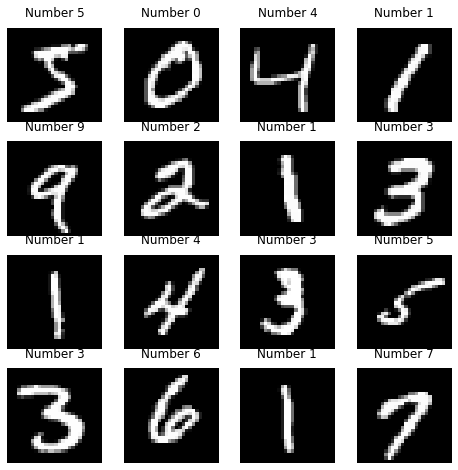

In [125]:
#Showing some image samples from Dataset
fig, axs = plt.subplots(4,4, figsize = (8,8))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
  
fig.show()

### *Preprocessing The Data*

In [126]:
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1) #converting 3D Data to 4D Data by using Reshape function
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1) #here 1 indicates the Gray Scale Images 

In [127]:
#changing the Data type of x_train and x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0]) #60,000 Images will use to train the model
print('Number of images in x_test', x_test.shape[0])   #10,000 Images will use to test the model

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


### Building The Convolutional Neural Network


In [128]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

**You can read the documentations for More Information**

https://www.tensorflow.org/api_docs/python/tf/keras/layers

### Compiling and Training the Model

In [129]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#optimizer, loss and metrics are the parameter, you can change them for better accuracy. But In my test, they are the perfect once.

model.fit(x=x_train,y=y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2203 - accuracy: 0.9334
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0915 - accuracy: 0.9723


In [130]:
#Evaluating the Accuracy Of the model.

model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0610 - accuracy: 0.9813


[0.06101331114768982, 0.9812999963760376]

In [131]:
#Here We Are Getting The Accuracy is 98.39%, that is very good for this Model.

In [132]:
val_loss, val_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0610 - accuracy: 0.9813


In [133]:
pred = model.predict(x_test)

In [134]:
pred

array([[2.1462547e-07, 3.0162676e-07, 5.0200248e-05, ..., 9.9993205e-01,
        8.9142503e-08, 6.0705502e-06],
       [7.5220196e-05, 8.3001296e-04, 9.9905223e-01, ..., 1.7459004e-10,
        1.8062715e-07, 8.5216651e-12],
       [2.4369353e-06, 9.9971110e-01, 8.4737301e-05, ..., 1.2997733e-04,
        2.0413085e-05, 1.6006186e-06],
       ...,
       [1.9792521e-09, 6.8955126e-07, 4.9758796e-08, ..., 1.3004732e-04,
        1.8496314e-05, 9.1788487e-04],
       [4.8027568e-06, 4.7426624e-06, 1.1682229e-07, ..., 1.8218955e-08,
        1.6509660e-03, 3.0678501e-07],
       [2.6419989e-06, 8.5145618e-10, 1.1133382e-06, ..., 5.4668869e-12,
        2.5592544e-07, 4.7144937e-09]], dtype=float32)

In [142]:
import numpy as np
print (np.argmax(pred[200]))

3


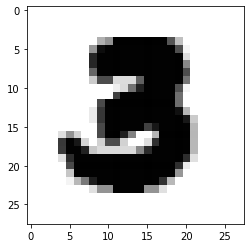

In [143]:
plt.imshow(X_test[200], cmap = plt.cm.binary)
plt.show()